In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from problema_1 import plot_bar_chart
# Importo el paquete para graficar
from matplotlib import pyplot as plt

# Naive bayes - Clasificación

### Bibliografía recomendada
https://nlp.stanford.edu/IR-book/ - Capitulo 13 -  
http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes

## Ejemplos

![](./images/student-admission.png)

![](./images/chip-test.png)

## Introducción teórica

### Teorema de Bayes
$P(y|x_1,x_2,...,x_n) = \large \frac{P(x_1, x_2,...,x_n|y) P(y)}{P(x_1,x_2,...,x_n)}$

El numerador:

$ \large P(x_1, x_2,...,x_n|y) P(y) = P(y, x_1, x_2,...,x_n)$

Por la regla de la cadena:

$P(x_1,x_2, x_3, y) = P(x_1 | x_2, x_3,y)P(x_2,x_3, y) = P(x_1 | x_2, x_3,y)P(x_2|x_3, y)P(x_3, y) = P(x_1 | x_2, x_3,y)P(x_2|x_3, y)P(x_3| y)P(y)$

$P(x_1,x_2, x_3, y) = P(x_1 | x_2, x_3,y)P(x_2|x_3, y)P(x_3| y)P(y)$

#### Ejemplo con Aplicación SPAM

$P(comprar,oferta,ganaste,SPAM) = P(comprar | oferta, ganaste,SPAM)P(oferta|ganaste, SPAM)P(ganaste| SPAM)P(SPAM)$

Asumiendo independencia

$P(x_i|y) = P(x_i|y,x_1,...)$

$P(comprar,oferta,ganaste,SPAM) = P(comprar | SPAM)P(oferta|SPAM)P(ganaste| SPAM)P(SPAM)$

### Naive Bayes

$P(y|x_1,x_2,...,x_n) = \large \frac{P(y)\prod P(x_i/y)} {P(x_1,x_2,...,x_n)} = \alpha {P(y)\prod P(x_i/y)}$

(Compararlo con teorema de Bayes)

$\large \hat{y} = arg max_y [{P(y)\prod P(x_i/y)}]$

Ejemplo SPAM: 

La variable aleatoria $y$ puede ser: [SPAM, NO_SPAM]. Calculo ${P(y)\prod P(x_i/y)}$ para ambos casos y me quedo con el mayor

Como el denominador es el mismo para ambos casos, no hace falta calcularlo

## Detección de SPAM
V. Metsis, I. Androutsopoulos and G. Paliouras (2006). Spam filtering with Naive Bayes – Which Naive Bayes? 3rd Conf. on Email and Anti-Spam (CEAS).
http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=1EEA3C5EE5DDF8409BCC0F09BFB7D98B?doi=10.1.1.61.5542&rep=rep1&type=pdf

Tenemos un dataset donde ya esta preprocesado el texto
- Lemmatization, stemming
- Stop words

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
import os
from collections import Counter
train_dir = './ling-spam/train-mails'
emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)] #Trae una lista de los correo de un directorio

In [6]:
emails[0:10]

['./ling-spam/train-mails/6-338msg1.txt',
 './ling-spam/train-mails/5-1300msg3.txt',
 './ling-spam/train-mails/6-250msg1.txt',
 './ling-spam/train-mails/6-266msg3.txt',
 './ling-spam/train-mails/spmsgc10.txt',
 './ling-spam/train-mails/5-1326msg1.txt',
 './ling-spam/train-mails/spmsga114.txt',
 './ling-spam/train-mails/spmsga100.txt',
 './ling-spam/train-mails/6-110msg3.txt',
 './ling-spam/train-mails/6-126msg1.txt']

In [7]:
with open(emails[5]) as m:
    print(m)
    for i,line in enumerate(m):
        print(i, line)

<_io.TextIOWrapper name='./ling-spam/train-mails/5-1326msg1.txt' mode='r' encoding='UTF-8'>
0 Subject: 

1 

2 n n o u n c n g cunyforum 18 , summer 1994 journal work paper linguistic , cuny graduate center c o n t e n t s development dominican vernacular spanish - - keat green pragmatic verbal abuse - - edgar . gregersen parse japanese relative clause : raise lower ? - - yukus hirose interpretation case - delet sentence japanese - - mana kobuchus - philip is innate functional category ? - - ingeborg lasser language contact sao tome principe ( west africa ) - - gerardo . lorenzino comparative morphosyntactic study restructure portuguese africa brazil - - heliana r . mello artificial cognition language - - john . moyne * * * subscription rate : regular $ 10 ; student $ 5 ; institution $ 20 ; oversea add $ 10 . send check : cunyforum ; linguistic department ; cuny graduate center ; 33 west 42nd street ; york , ny 10036 . inquiry emfgc @ cunyvm . cuny . edu .



In [8]:
def make_Dictionary(train_dir):
    # Train dir es la carpeta para parsear
    emails_array = []
    labels = []
    # Emails es una lista con los nombres de los archivos
    emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)] 
    # All words contendrá todas las palabras del mail
    all_words = []       
    for mail in emails:
        # mail es el nombre del archivo
        with open(mail) as m:
            # m es el archivo abierto
            if 'spmsg' in mail.split('/')[-1]:
                # Si el nombre del archivo contiene 'spmsg' es spam
                labels.append(True)
            else:
                labels.append(False)
            # email_str va a guardar el mail como string
            email_str = ''
            for i,line in enumerate(m):
                if i == 2:  #Body of email is only 3rd line of text file
                    words = line.split()
                    all_words += words
                    email_str = email_str + ' ' + line
            emails_array.append(email_str)
    dictionary = Counter(all_words)
    return dictionary, emails_array, labels

def remove_uncommon_words(dictionary):
    # Dictionary es un counter
    dict_copy = { k : v for k,v in dictionary.items()}
    list_to_remove = dictionary.keys()
    for item in list_to_remove:
        if item.isalpha() == False: 
            # Remueve lo que no sean palabras con letras del abcedario
            del dict_copy[item]
        elif len(item) == 1:
            # Remueve las palabras de una letra
            del dict_copy[item]
    return Counter(dict_copy)

In [9]:
def read_emails_and_get_dict(folder, max_features=3000):
    dictionary, emails_array, labels = make_Dictionary(folder)
    dictionary = remove_uncommon_words(dictionary)
    dictionary = dictionary.most_common(max_features)
    vocabulary = [key[0] for key in dictionary]
    return vocabulary, emails_array, np.array(labels)

In [10]:
max_features = 3000

In [11]:
vocabulary, emails_array, labels = read_emails_and_get_dict('./ling-spam/train-mails', max_features)
count_vectorizer = CountVectorizer(vocabulary=vocabulary)
feature_matrix = count_vectorizer.fit_transform(emails_array)

In [12]:
print(labels[0:10])
print(vocabulary[0:10])
print(feature_matrix)

[False False False False  True False  True  True False False]
['order', 'address', 'report', 'mail', 'send', 'language', 'email', 'program', 'our', 'list']
  (0, 19)	1
  (0, 24)	2
  (0, 273)	1
  (0, 305)	1
  (0, 533)	1
  (0, 562)	1
  (0, 701)	1
  (0, 717)	1
  (0, 1285)	1
  (0, 1418)	1
  (0, 1650)	2
  (1, 1)	2
  (1, 4)	3
  (1, 5)	3
  (1, 6)	2
  (1, 11)	1
  (1, 12)	2
  (1, 16)	1
  (1, 18)	3
  (1, 19)	3
  (1, 22)	1
  (1, 27)	2
  (1, 29)	3
  (1, 31)	3
  (1, 32)	1
  :	:
  (701, 748)	1
  (701, 800)	1
  (701, 865)	1
  (701, 873)	1
  (701, 913)	1
  (701, 919)	1
  (701, 952)	1
  (701, 1017)	1
  (701, 1150)	1
  (701, 1232)	1
  (701, 1263)	1
  (701, 1355)	1
  (701, 1485)	1
  (701, 1486)	1
  (701, 1603)	1
  (701, 1637)	1
  (701, 1816)	1
  (701, 1825)	1
  (701, 1903)	1
  (701, 2362)	1
  (701, 2402)	1
  (701, 2495)	1
  (701, 2672)	2
  (701, 2777)	1
  (701, 2986)	1


In [86]:
print(feature_matrix.sum(axis=0).shape)
print(feature_matrix.sum(axis=0))
print(feature_matrix.sum(axis=0) + 1)
print((feature_matrix.sum(axis=0) + 1).sum())

(1, 3000)
[[1423 1302 1216 ...,    8    8    8]]
[[1424 1303 1217 ...,    9    9    9]]
157987


In [87]:
def get_histogram_from_matrix(alpha, feature_matrix):
    # Alpha es para suavizar y evitar la probabilidad cero. Normalmente 1
    # Es como agregar un mail con todas las palabras
    words_distribution_un = feature_matrix.sum(axis=0) + alpha
    words_distribution = words_distribution_un/(words_distribution_un.sum()) # + alpha*feature_matrix.shape[1])
    return words_distribution

spam_feature_matrix = feature_matrix[labels,:]
ham_feature_matrix = feature_matrix[np.logical_not(labels),:]

print('SPAM:',labels.nonzero()[0].shape[0],
      'HAM:',np.logical_not(labels).nonzero()[0].shape[0],
      'total:',len(labels))

print()
print('Palabras diferentes')
print('SPAM:', spam_feature_matrix.nonzero()[0].shape[0],
      'HAM:',ham_feature_matrix.nonzero()[0].shape[0])

print()
print('Cantidad de palabras')
print('SPAM:',spam_feature_matrix.sum(), 'HAM:',ham_feature_matrix.sum())


# P(x_i/SPAM)
spam_words_distribution = get_histogram_from_matrix(1, spam_feature_matrix)
# P(x_i/HAM)
ham_words_distribution = get_histogram_from_matrix(1, ham_feature_matrix)

SPAM: 351 HAM: 351 total: 702

Palabras diferentes
SPAM: 49290 HAM: 33347

Cantidad de palabras
SPAM: 98144 HAM: 56843


$\hat{y} = arg max_y [{P(y)\prod P(x_i/y)}]$

$y = [SPAM, HAM]$

In [88]:
def plot_bar_chart(P, vocabulary = None, title='title'):
    N = len(P)
    plt.figure(figsize=(20, 5)) # Tamaño del gráfico
    indexes = list(range(1, len(P) + 1))
    plt.bar(indexes, P, width=0.75, color='b') # Grafico
    plt.title(title)

    # Definición de indices
    if not vocabulary:
        string_indexes = [str(i) for i in indexes]
    else:
        string_indexes = [vocabulary[i-1] for i in indexes]
    plt.xlim([0,N+1])
    plt.xticks(indexes, string_indexes) 
    plt.xticks(rotation=60)
    plt.show()

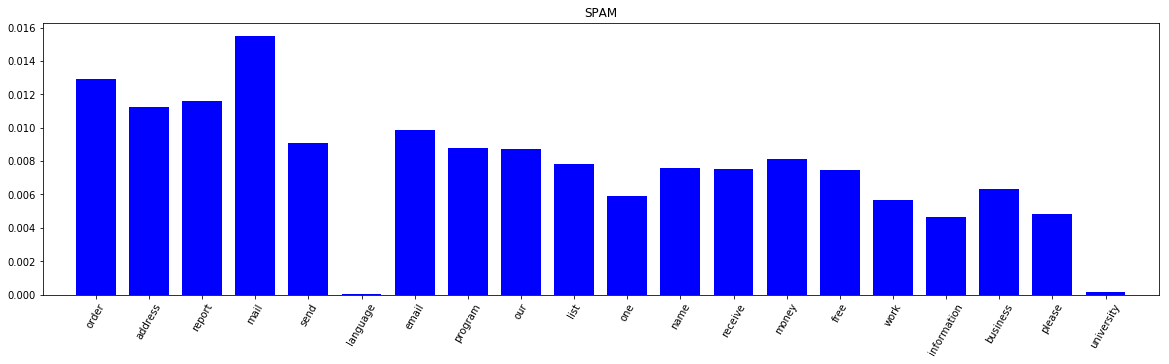

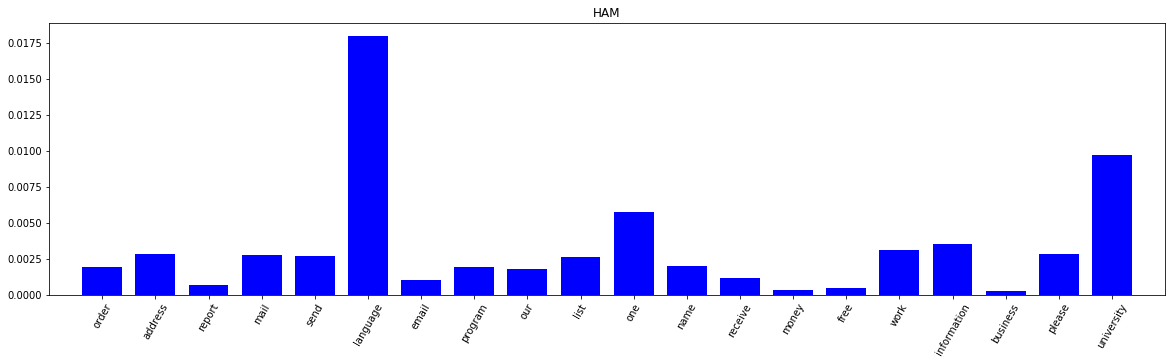

In [89]:
N = 20
plot_bar_chart(np.array(spam_words_distribution)[0][:N],
               vocabulary = vocabulary,
               title='SPAM')
plot_bar_chart(np.array(ham_words_distribution)[0][:N],
               vocabulary = vocabulary,
               title='HAM')

In [147]:
# Veamos si el primer email es SPAM o no
# El primer mail corresponde a la primer fila de la matriz
row = feature_matrix[0,:]
print('Primer email codificado:')
print(row)

non_zero_row = row.nonzero()
print('Elementos distintos de cero:',non_zero_row[1])
print('Producto, no es necesario [P(Y) = P(SPAM) = P(HAM)] por que es para ambos casos igual. Lo mismo el denominador')
print(spam_words_distribution[0, non_zero_row].prod())
print(ham_words_distribution[0, non_zero_row].prod())
print('Log likelihood')
print(np.log(spam_words_distribution[0, non_zero_row]).sum())
print(np.log(ham_words_distribution[0, non_zero_row]).sum())

Primer email codificado:
  (0, 19)	1
  (0, 24)	2
  (0, 273)	1
  (0, 305)	1
  (0, 533)	1
  (0, 562)	1
  (0, 701)	1
  (0, 717)	1
  (0, 1285)	1
  (0, 1418)	1
  (0, 1650)	2
Elementos distintos de cero: [  19   24  273  305  533  562  701  717 1285 1418 1650]
Producto, no es necesario [P(Y) = P(SPAM) = P(HAM)] por que es para ambos casos igual. Lo mismo el denominador
4.17577074434e-61
1.14898012516e-66
Log likelihood
-139.028391722
-151.831741436


¿Por que usamos log likelihood?

In [152]:
def get_accuracy(feature_matrix, labels, spam_words_distribution, ham_words_distribution):
    P_SPAM = labels.nonzero()[0].shape[0]/len(labels) # Por que no es necesario en este caso?
    P_HAM = np.logical_not(labels).nonzero()[0].shape[0]/len(labels) # Por que no es necesario en este caso?
    correct_count = 0
    for i, row in enumerate(feature_matrix):
        coded_email = row.nonzero()
        spam_log_likelihood = np.log(spam_words_distribution[coded_email]).sum() + np.log(P_SPAM)
        ham_log_likelihood = np.log(ham_words_distribution[coded_email]).sum() + np.log(P_HAM)
        SPAM = spam_log_likelihood>=ham_log_likelihood
        if SPAM == labels[i]:
            correct_count = correct_count + 1
    print('%0.3f'%(correct_count/len(labels)))

In [153]:
get_accuracy(feature_matrix, labels, spam_words_distribution, ham_words_distribution)

0.987


## Test set

In [154]:
_, emails_array, labels_test = read_emails_and_get_dict('./ling-spam/test-mails', max_features)
count_vectorizer_test = CountVectorizer(vocabulary=vocabulary)
feature_matrix_test = count_vectorizer.fit_transform(emails_array)

In [155]:
get_accuracy(feature_matrix_test, labels_test, spam_words_distribution, ham_words_distribution)

0.965


# Sklearn MultinomialNB

In [156]:
from sklearn.naive_bayes import MultinomialNB

In [192]:
clf = MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=False) #Defino el modelo

In [193]:
clf.fit(feature_matrix, labels) #Entreno

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=False)

In [194]:
clf.score(feature_matrix, labels) 

0.99002849002849003

In [195]:
clf.score(feature_matrix_test, labels_test)

0.96153846153846156

In [167]:
clf.predict(feature_matrix_test[100:150]) #Pido resultados de 150 mails a partir del numero 100

array([False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
        True, False, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True, False], dtype=bool)

In [162]:
clf.predict_proba(feature_matrix_test[100:110]) #Pido la probabilidad de prediccion de los primeros 10 mails a partir del numero 100

array([[  1.00000000e+000,   4.32577416e-203],
       [  1.00000000e+000,   9.25701855e-168],
       [  4.22016090e-015,   1.00000000e+000],
       [  1.00000000e+000,   9.54021707e-106],
       [  9.61964302e-147,   1.00000000e+000],
       [  2.47312152e-090,   1.00000000e+000],
       [  9.85266748e-006,   9.99990147e-001],
       [  9.76629082e-029,   1.00000000e+000],
       [  1.00000000e+000,   2.04412793e-077],
       [  1.00000000e+000,   7.70903147e-057]])

# Sklearn BernoulliNB
Suele ser interesante evaluar Multinomial y Bernoulli para comparar resultados. A veces para textos cortos BernoulliNB puede dar mejores resultados

In [118]:
from sklearn.naive_bayes import BernoulliNB

In [143]:
clf_Ber = BernoulliNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=False, binarize=0.5)

In [144]:
clf_Ber.fit(feature_matrix, labels)

BernoulliNB(alpha=1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

In [145]:
clf_Ber.score(feature_matrix, labels)

0.86039886039886038

In [146]:
clf_Ber.score(feature_matrix_test, labels_test)

0.76538461538461533

# ¿Es posible graficar un problema de dimensión 3000 en 2 dimensiones?

In [48]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
fmd = feature_matrix.todense()
svd = TruncatedSVD(n_components=8, n_iter=200, random_state=42)
svd.fit(fmd.T)
X_embedded = TSNE(n_components=2).fit_transform(svd.components_.T)

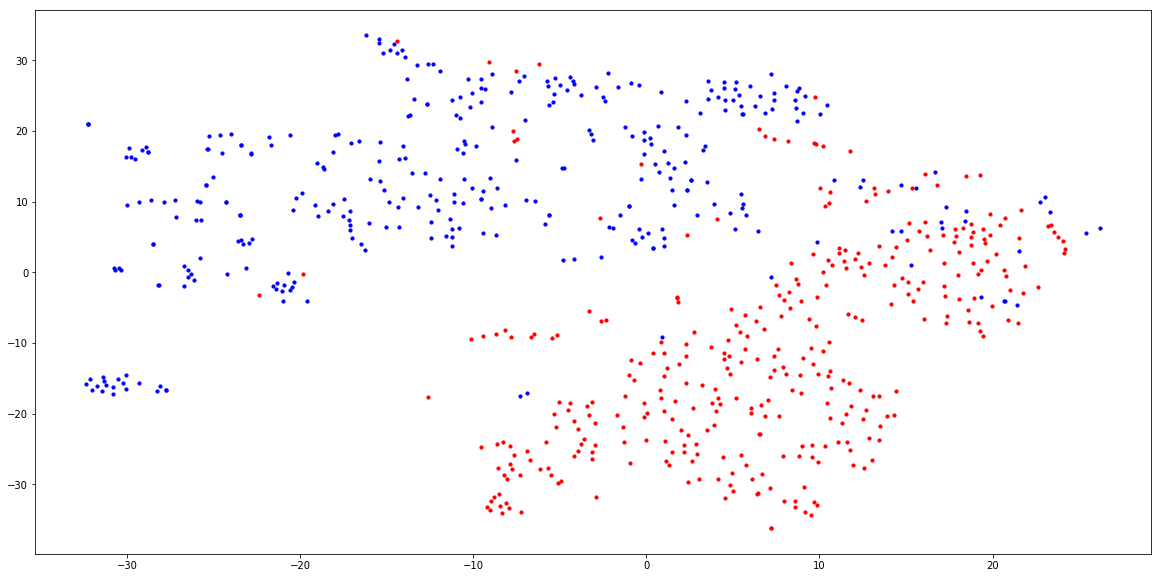

In [49]:
plt.figure(figsize=(20,10))
plt.scatter(X_embedded[labels,0], X_embedded[labels,1], color='b', s=10)
plt.scatter(X_embedded[np.logical_not(labels),0], X_embedded[np.logical_not(labels),1], color='r', s=10)
plt.show()

# Gaussian NB
https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Sex_classification

In [50]:
# Datos originales de wikipedia
data = [
    {"genero":'hombre', 'altura': 6, 'peso': 180,'pie':12}, 
    {"genero":'hombre', 'altura': 5.92, 'peso': 190,'pie':11}, 
    {"genero":'hombre', 'altura': 5.58, 'peso': 170,'pie':12}, 
    {"genero":'hombre', 'altura': 5.92, 'peso': 165,'pie':10}, 
    {"genero":'mujer', 'altura': 5, 'peso': 100,'pie':6}, 
    {"genero":'mujer', 'altura': 5.5, 'peso': 150,'pie':8}, 
    {"genero":'mujer', 'altura': 5.42, 'peso': 130,'pie':7}, 
    {"genero":'mujer', 'altura': 5.75, 'peso': 150,'pie':9}, 
]

In [51]:
# Altura en cm y peso en kg
data = [{'altura': 183, 'genero': 'hombre', 'peso': 82, 'pie': 12},
         {'altura': 180, 'genero': 'hombre', 'peso': 86, 'pie': 11},
         {'altura': 170,'genero': 'hombre','peso': 77,'pie': 12},
         {'altura': 180, 'genero': 'hombre', 'peso': 75, 'pie': 10},
         {'altura': 152, 'genero': 'mujer', 'peso': 45, 'pie': 6},
         {'altura': 167, 'genero': 'mujer', 'peso': 68, 'pie': 8},
         {'altura': 165, 'genero': 'mujer', 'peso': 59, 'pie': 7},
         {'altura': 175, 'genero': 'mujer', 'peso': 68, 'pie': 9}]

In [52]:
GNB_features_matrix = np.zeros((len(data),3))
GNB_labels = np.empty((len(data)), dtype=object)
print('Matriz y lista antes de llenar')
print(GNB_features_matrix)
print(GNB_labels)

for i, person in enumerate(data):
    GNB_features_matrix[i, 0] = person['altura']
    GNB_features_matrix[i, 1] = person['peso']
    GNB_features_matrix[i, 2] = person['pie']
    GNB_labels[i] = person['genero']
print()
print('Matriz y lista con los datos:')
print(GNB_features_matrix)
print(GNB_labels)

Matriz y lista antes de llenar
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[None None None None None None None None]

Matriz y lista con los datos:
[[ 183.   82.   12.]
 [ 180.   86.   11.]
 [ 170.   77.   12.]
 [ 180.   75.   10.]
 [ 152.   45.    6.]
 [ 167.   68.    8.]
 [ 165.   59.    7.]
 [ 175.   68.    9.]]
['hombre' 'hombre' 'hombre' 'hombre' 'mujer' 'mujer' 'mujer' 'mujer']


In [53]:
men_means = GNB_features_matrix[GNB_labels=='hombre',:].mean(axis=0)
women_means = GNB_features_matrix[GNB_labels=='mujer',:].mean(axis=0)
men_vars = GNB_features_matrix[GNB_labels=='hombre',:].var(axis=0, ddof=1)
women_vars = GNB_features_matrix[GNB_labels=='mujer',:].var(axis=0, ddof=1)
print('medias de los hombres:', men_means)
print('varianzas de los hombres:', men_vars)
print('medias de las mujeres:', women_means)
print('varianzas de las mujeres:', women_vars)

medias de los hombres: [ 178.25   80.     11.25]
varianzas de los hombres: [ 32.25        24.66666667   0.91666667]
medias de las mujeres: [ 164.75   60.      7.5 ]
varianzas de las mujeres: [  90.91666667  118.            1.66666667]


In [54]:
def gaussian(x, mu, sig):
    return np.exp(-np.power((x - mu)/sig, 2.)/2)/(np.sqrt(2.*np.pi)*sig)

def plot_gaussian(mu=0, sig= 1, points = 200, N = 2, marker=None, label = None, x = None, color = None, 
                  x_label='',y_label='',ax = None, figsize = (20,10), center_label_tick = None):
    if ax is None:
        f, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize = figsize)
    if x is None:
        x = np.linspace(mu-N*sig, mu+N*sig, points)
    y = gaussian(x, mu, sig)
    ax.plot(x,y, marker = marker, label = label, color = color)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)

    if center_label_tick is not None:
        labels = [item.get_text() for item in ax.get_xticklabels()]
        labels[int((len(labels)-1)/2)] = center_label_tick
        ax.set_xticklabels(labels)

    return x, y

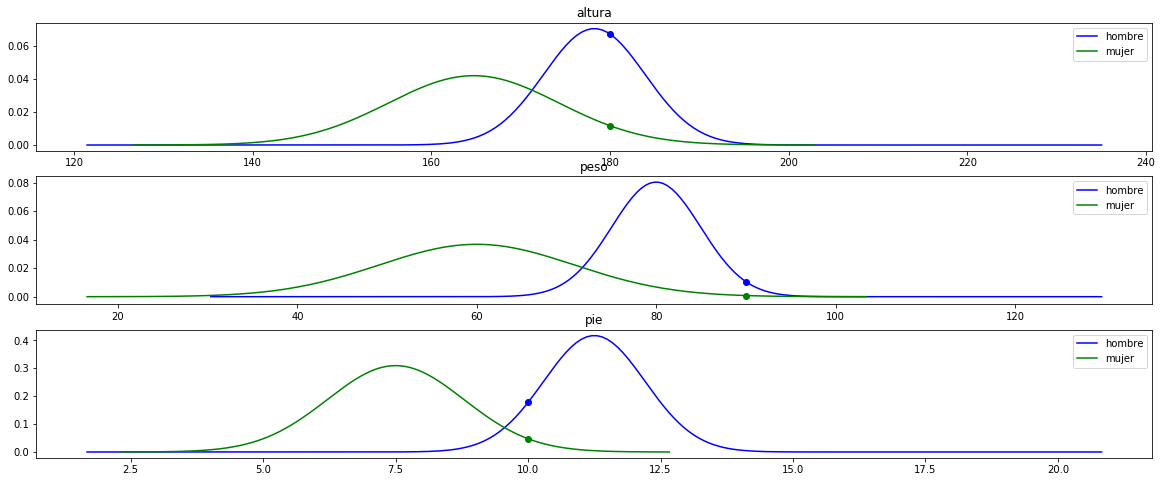

In [55]:
sample = np.array([180,90,10])

f, axs = plt.subplots(3, 1, sharey=False, sharex=False, figsize = (20,8))
keys = ['altura', 'peso','pie']
for i, ax in enumerate(axs):
    plot_gaussian(men_means[i], np.sqrt(men_vars[i]), ax=ax, N=10, color='b', label='hombre')
    plot_gaussian(women_means[i], np.sqrt(women_vars[i]), ax=ax, N=4, color='g', label='mujer')
    ax.scatter(sample[i], gaussian(sample[i], men_means[i], np.sqrt(men_vars[i])), color='b')
    ax.scatter(sample[i], gaussian(sample[i], women_means[i], np.sqrt(women_vars[i])), color='g')
    ax.title.set_text(keys[i])
    ax.legend()
plt.show()

In [56]:
p_hombre = len(GNB_features_matrix[GNB_labels=='hombre',:])/len(GNB_features_matrix)
p_altura_hombre = gaussian(sample[0], men_means[0], np.sqrt(men_vars[0]))
p_peso_hombre = gaussian(sample[1], men_means[1], np.sqrt(men_vars[1]))
p_pie_hombre = gaussian(sample[2], men_means[2], np.sqrt(men_vars[2]))
posterior_hombre = p_hombre*p_altura_hombre*p_peso_hombre*p_pie_hombre
print('Posteriori de hombre:', posterior_hombre)

Posteriori de hombre: 6.29781391114e-05


In [57]:
p_mujer = len(GNB_features_matrix[GNB_labels=='hombre',:])/len(GNB_features_matrix)
p_altura_mujer = gaussian(sample[0], women_means[0], np.sqrt(women_vars[0]))
p_peso_mujer = gaussian(sample[1], women_means[1], np.sqrt(women_vars[1]))
p_pie_mujer = gaussian(sample[2], women_means[2], np.sqrt(women_vars[2]))
posterior_mujer = p_mujer*p_altura_mujer*p_peso_mujer*p_pie_mujer
print('Posteriori de Mujer:', posterior_mujer)

Posteriori de Mujer: 2.2363824638e-07


In [58]:
if posterior_mujer>posterior_hombre:
    print('MUJER')
else:
    print('HOMBRE')

HOMBRE


Notar que no hace falta calcular el denominador

# Utilizando sklearn

In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(GNB_features_matrix, GNB_labels)

In [80]:
samples = np.array([[180,90,10], [160, 70, 8], [178, 73, 9], [178, 74, 9]])
print(y_pred.predict(samples))
print(y_pred.predict_proba(samples))

['hombre' 'mujer' 'mujer' 'hombre']
[[  9.99077440e-01   9.22560042e-04]
 [  3.59206251e-07   9.99999641e-01]
 [  4.34003950e-01   5.65996050e-01]
 [  5.59309521e-01   4.40690479e-01]]


## Problema 2
Utilizando las siguientes funciones/paquetes resolver los siguientes problemas de clasificación en **problema_2.py**:

**genfromtxt** de **numpy** para leer los dos datasets:
- ./datasets/student_admission.txt
- ./datasets/chip_tests.txt

**train_test_split** de **sklearn** para dividir entre test set y train set. Recomendamos un 40% de datos para test set

**GaussianNB** de **sklearn** como modelo de ML.

Y la función **plot_boundaries(X_train, X_test, y_train, y_test, score, predict_proba, ax=ax, h=h)** incluida en problema_2.py para graficar los resultados. X_train es un np.array con los features de entrada, y_train es la etiqueta. Lo mismo con X_test e y_test, Score es el 'accuracy' del modelo, predict_proba es la función que dada una entrada de la probabilidad de clasificar correcto y h es el paso para la grafica del 'boundary'